# Video Game Sales

## Goal 

You work for a data science consulting company. A major video game production company has retained your firm to conduct market research into the video game industry. They've furnished you with video game sales data for the last thirty years (described below) and, as a first project, would like to know:

1. What are some major differences between the North American, European, and Japanese video game markets?
2. What video game genres are trending in each market?
3. What features about a video game are most indicative of its success?

## Method

**EDA**: remove duplicated data and null data, rescale NA, EU, JP, other scales (markets) using global scales as the normalization factor. For example, NA_sales_norm = NA_sales/Global_Sales.

**Features**: Features include years, platforms, genres and publishers. Group by each feature and sum up NA, EU, JP and other scales for comparison. 

**Visualization**: Use matplotlib to visualize market performance as functions of various feactures. 


## Results

Game market was peaked around 2008, and now drops. North American (NA) mostly dominated the game market over other markets. Japan market was comparable to European market. Other market was less important than the other three markets. 

PS2 was popular in all markets, DS was most popular in NA market, followed by Will and X360. PC was more popular in EU market, and PSP more popular in JP market.

For genre analysis: Action was popular in general. Action and ports were top 2 genres in NA market, Role-Playing was quite popular in JP market. 

Japan market should focus on Konami, Nintendo, Namco Bandai, and Tecmo Koei. NA market shoud more focus on Electronic Arts, Activision, Ubisoft, THQ, ect. EU was less active than NA and JP markets. 

Platforms and Publishers are really important for video game sucess in the near future, followed by genres. Video games has become less popular than one decade ago, so focusing on the right platforms and pubsliers should be the key metrics. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## EDA

In [2]:
df0 = pd.read_csv('vgsales.csv')

In [3]:
df0.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df = df0.drop('Rank', axis=1)

In [5]:
df[df.duplicated(keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14997,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02
14999,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02


In [6]:
df = df.drop_duplicates()
df.shape

(16597, 10)

In [7]:
# Any missing values?
df.isna().any()

Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [8]:
df = df.dropna()

In [9]:
# Again, any missing values? Now ready to go. 
df.isna().any()

Name            False
Platform        False
Year            False
Genre           False
Publisher       False
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [10]:
df.dtypes

Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [11]:
# Change years to integers

df.Year = df.Year.astype(int)
df.dtypes

Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [12]:
# Now rescale NA, EU, JP and other scales using global_scales

df = df[df['Global_Sales'] > 0]

df['NA_Sales_norm'] = df['NA_Sales']/df['Global_Sales']
df['EU_Sales_norm'] = df['EU_Sales']/df['Global_Sales']
df['JP_Sales_norm'] = df['JP_Sales']/df['Global_Sales']
df['Other_Sales_norm'] = df['Other_Sales']/df['Global_Sales']

In [13]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales_norm,EU_Sales_norm,JP_Sales_norm,Other_Sales_norm
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0.501450,0.350737,0.045564,0.102248
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.722664,0.088966,0.169235,0.019135
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0.442490,0.359576,0.105807,0.092406
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0.477273,0.333636,0.099394,0.089697
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.359260,0.283392,0.325789,0.031878


## Data Visualization

In [14]:
# First group by year and sum markets

df_year = df.groupby('Year').sum().reset_index()
df_year

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales_norm,EU_Sales_norm,JP_Sales_norm,Other_Sales_norm
0,1980,10.59,0.67,0.00,0.12,11.38,8.386512,0.518144,0.000000,0.074085
1,1981,33.40,1.96,0.00,0.32,35.77,42.933275,2.491975,0.000000,0.267823
2,1982,26.92,1.65,0.00,0.31,28.86,33.580614,2.072142,0.000000,0.317704
3,1983,7.76,0.80,8.10,0.14,16.79,11.666636,0.954705,4.227699,0.132970
4,1984,33.28,2.10,14.27,0.70,50.36,4.749832,0.750878,8.364849,0.131947
5,1985,33.73,4.74,14.56,0.92,53.94,4.324773,1.807256,7.774559,0.426746
6,1986,12.50,2.84,19.81,1.93,37.07,6.781727,1.251483,12.239373,0.769136
7,1987,8.46,1.41,11.63,0.20,21.74,8.712272,0.709017,6.290076,0.081674
8,1988,23.87,6.59,15.76,0.99,47.22,6.534917,1.907786,5.983074,0.532556
9,1989,45.15,8.44,18.36,1.50,73.45,8.495292,1.875576,6.379007,0.263068


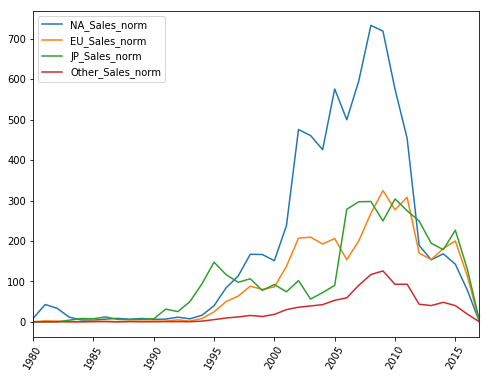

In [15]:
regions = ['NA_Sales_norm', 'EU_Sales_norm', 'JP_Sales_norm', 'Other_Sales_norm']

fig=plt.figure(figsize=(8, 6))

for region in regions:
    y = df_year[region]
    x = df_year['Year']
    plt.xticks(rotation=60)
    plt.xlim(1980, 2017)
    #plt.title()
    plt.plot(x, y)
    #plt.show()
    
plt.legend(regions,loc='best')

North American (NA) dominated the game market, and picked at 2008. Japan market is comparable to European market. 

In [16]:
# Second group by platform and sum markets

df_platform = df.groupby('Platform').sum().drop('Year', axis=1).reset_index()
df_platform

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales_norm,EU_Sales_norm,JP_Sales_norm,Other_Sales_norm
0,2600,80.78,4.86,0.00,0.84,86.57,108.273513,6.360114,0.000000,0.797789
1,3DO,0.00,0.00,0.10,0.00,0.10,0.000000,0.000000,3.000000,0.000000
2,3DS,78.03,58.29,97.30,12.55,246.27,130.681859,90.658802,258.240600,16.743685
3,DC,5.43,1.69,8.56,0.27,15.97,3.797836,1.026517,46.990696,0.172486
4,DS,388.53,194.05,175.02,60.29,818.91,1156.740018,254.380175,592.761490,97.917567
5,GB,113.64,47.51,85.12,8.16,254.42,21.900959,9.671451,63.664558,1.765133
6,GBA,178.43,72.49,46.56,7.51,305.62,499.348922,177.884070,89.323529,7.528274
7,GC,131.94,38.32,21.34,5.13,197.14,390.982449,98.632792,33.962864,7.543123
8,GEN,19.27,5.52,2.67,0.89,28.36,7.914560,2.252189,16.466893,0.372472
9,GG,0.00,0.00,0.04,0.00,0.04,0.000000,0.000000,1.000000,0.000000


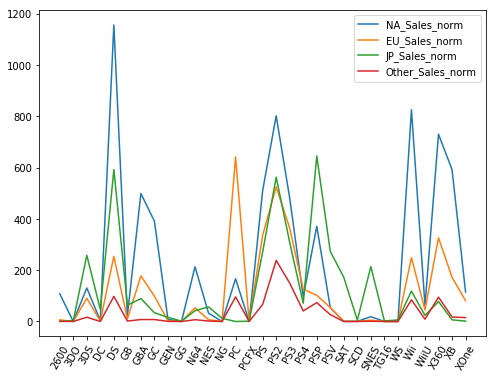

In [17]:
fig=plt.figure(figsize=(8, 6))

for region in regions:
    y = df_platform[region]
    x = df_platform['Platform']
    plt.xticks(rotation=60)
    #plt.xlim(1980, 2017)
    #plt.title()
    plt.plot(x, y)
    #plt.show()
    
plt.legend(regions,loc='best')

Note that EU peaked at PC platform, and JP peaked at PSP, SNES. 

In [18]:
# Third group by platform and sum markets

df_genre = df.groupby('Genre').sum().drop('Year', axis=1).reset_index()
df_genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales_norm,EU_Sales_norm,JP_Sales_norm,Other_Sales_norm
0,Action,861.77,516.48,158.65,184.92,1722.84,1514.933193,815.599679,661.807414,234.799810
1,Adventure,101.93,63.74,51.99,16.70,234.59,339.133727,206.996064,672.014545,48.917814
2,Fighting,220.74,100.00,87.15,36.19,444.05,348.312561,144.734085,293.751915,48.996634
3,Misc,396.92,211.77,106.67,73.92,789.87,798.880991,325.599222,436.708826,111.625940
4,Platform,445.99,200.65,130.65,51.51,829.13,494.736058,210.253931,106.313595,53.633172
5,Puzzle,122.01,50.52,56.68,12.47,242.21,314.800701,117.117090,100.056744,27.147734
6,Racing,356.93,236.31,56.61,76.68,726.76,669.780997,374.999773,72.514053,95.220605
7,Role-Playing,326.50,187.57,350.29,59.38,923.83,432.441342,230.338826,726.725780,75.236874
8,Shooter,575.16,310.45,38.18,101.90,1026.20,682.438665,376.717855,108.709059,99.785345
9,Simulation,181.78,113.02,63.54,31.36,389.98,403.771645,194.044879,185.845995,56.042945


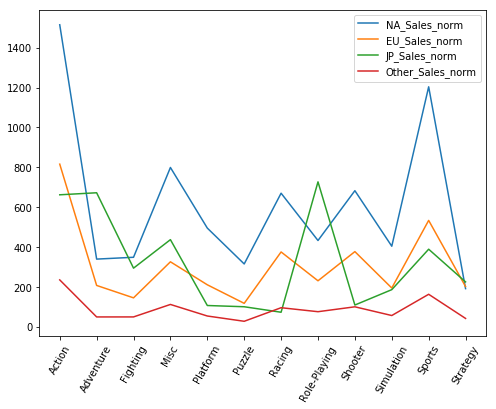

In [19]:
fig=plt.figure(figsize=(8, 6))

for region in regions:
    y = df_genre[region]
    x = df_genre['Genre']
    plt.xticks(rotation=60)
    #plt.xlim(1980, 2017)
    #plt.title()
    plt.plot(x, y)
    #plt.show()
    
plt.legend(regions,loc='best')

Action was popular in NA, and Role-Playing was popular in JP. People may also want to see trends along years. 

In [20]:
df_genre2 = df.groupby(['Year','Genre']).sum().reset_index()
df_genre2.head()

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales_norm,EU_Sales_norm,JP_Sales_norm,Other_Sales_norm
0,1980,Action,0.32,0.02,0.0,0.00,0.34,0.941176,0.058824,0.0,0.000000
1,1980,Fighting,0.72,0.04,0.0,0.01,0.77,0.935065,0.051948,0.0,0.012987
2,1980,Misc,2.53,0.15,0.0,0.02,2.71,3.715885,0.224229,0.0,0.018219
3,1980,Shooter,6.56,0.43,0.0,0.08,7.07,1.855610,0.121919,0.0,0.022470
4,1980,Sports,0.46,0.03,0.0,0.01,0.49,0.938776,0.061224,0.0,0.020408


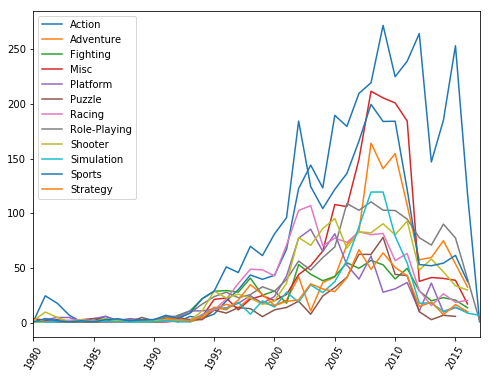

In [21]:
genre_column = list(df_genre.Genre.unique())

fig=plt.figure(figsize=(8, 6))

for genre in genre_column:
    y = df_genre2['NA_Sales_norm'][df_genre2['Genre']==genre] \
       + df_genre2['EU_Sales_norm'][df_genre2['Genre']==genre] \
       + df_genre2['JP_Sales_norm'][df_genre2['Genre']==genre] \
       + df_genre2['Other_Sales_norm'][df_genre2['Genre']==genre]
    
    x = df_genre2['Year'][df_genre2['Genre']==genre]
    plt.xticks(rotation=60)
    plt.xlim(1980, 2017)
    #plt.title()
    plt.plot(x, y)
    #plt.show()
    
plt.legend(genre_column,loc='best')

Basically all genres followed similar trends. Less insightful than the previous figure. Now let us go to Publisher analysis. 

In [22]:
# Fourth group by publisher and sum markets

df_publisher = df.groupby('Publisher').sum().drop('Year', axis=1).reset_index()
df_publisher.sort_values('NA_Sales_norm', ascending = False, inplace = True) 

In [23]:
df_publisher.head(50)

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales_norm,EU_Sales_norm,JP_Sales_norm,Other_Sales_norm
138,Electronic Arts,584.22,367.38,13.98,127.63,1093.39,765.346537,414.118768,21.619291,129.923399
21,Activision,426.01,213.72,6.54,74.79,721.41,642.705031,227.544462,4.003313,83.216548
524,Ubisoft,252.81,163.03,7.33,50.16,473.54,526.154690,284.609445,20.704706,77.311313
487,THQ,208.60,94.60,5.01,32.11,340.44,468.305054,178.850990,6.539833,56.308001
275,Konami Digital Entertainment,88.91,68.62,90.93,29.91,278.56,274.791480,132.160827,366.343213,41.971550
455,Sony Computer Entertainment,265.22,187.55,74.10,80.40,607.28,269.135508,192.865400,139.096358,81.985094
493,Take-Two Interactive,220.47,117.95,5.83,55.20,399.30,260.563744,107.459211,3.607063,39.555610
359,Nintendo,815.75,418.30,454.99,95.19,1784.43,258.393402,117.181173,294.419747,25.302893
53,Atari,101.23,25.80,10.70,8.73,146.77,231.152290,74.873744,14.839474,19.989384
445,Sega,108.78,81.41,56.19,24.30,270.70,191.079339,129.549649,270.459439,38.218853


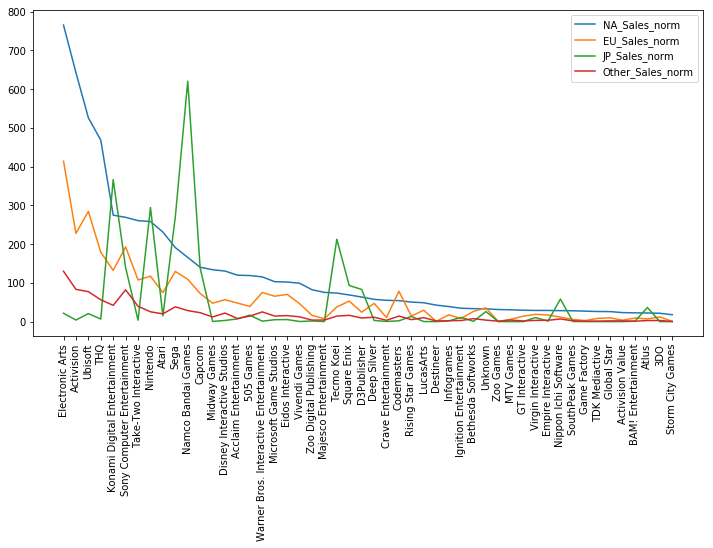

In [24]:
fig=plt.figure(figsize=(12, 6))

for region in regions:
    y = df_publisher.head(50)[region]
    x = df_publisher.head(50)['Publisher']
    plt.xticks(rotation=90)
    #plt.xlim(1980, 2017)
    #plt.title()
    plt.plot(x, y)
    #plt.show()
    
plt.legend(regions,loc='best')

Japan market should focus on Konami, Nintendo, Namco Bandai, and Tecmo Koei. NA market shoud more focus on the left several publishers. EU was less active than NA and JP markets. 